In [33]:
import json
import os, re
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor

In [145]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

In [5]:
files = []
for file in os.listdir('data'):
    if re.match('^2.*jsons', file):
        files.append(file)

In [6]:
def parseJsons(file):
    with open('data/{}'.format(file)) as f:
        sl = []
        for i, line in enumerate(f):
            _s = pd.read_json(line, typ='series')
            sl.append(_s)
        df = pd.concat(sl, axis=1).T
        df['time'] = df['time'].astype(float)
        df['acc'] = df['acc'].astype(float)
        df['loss'] = df['loss'].astype(float)
    return df

In [7]:
for i, file in enumerate(files):
    if i == 0:
        df_all = parseJsons(file)
    else:
        df_all = df_all.append(parseJsons(file))

In [216]:
_dprint = df_all.groupby(['dataset', 'architecture','instance_type'])['time','loss'].aggregate({'time' : [np.mean, np.std], 'loss' : ['min']})
_dprint['Czas (s)'] = _dprint['time']['mean'].round(2).astype(str)+'+/-'+_dprint['time']['std'].round(2).astype(str)
_dprint['Funkcja straty'] = _dprint['loss']['min'].round(4).astype(str)
_dprint.columns = _dprint.columns.get_level_values(0)

In [220]:
print(_dprint[['Czas (s)', 'Funkcja straty']].to_latex())

\begin{tabular}{lllll}
\toprule
      &        &            &       Czas (s) & Funkcja straty \\
dataset & architecture & instance\_type &                &                \\
\midrule
cifar & custom & c4.2xlarge &   29.16+/-0.32 &         0.0852 \\
      &        & p2.xlarge &    4.05+/-0.09 &         0.0913 \\
      & kerasdef & c4.2xlarge &    23.2+/-0.53 &         0.3513 \\
      &        & p2.xlarge &    4.39+/-0.14 &         0.3391 \\
imdb &        & c4.2xlarge &  125.12+/-2.07 &         0.0309 \\
      &        & p2.xlarge &   10.31+/-0.44 &         0.0314 \\
      & lstmkerasdef & c4.2xlarge &    46.8+/-1.87 &         0.0101 \\
      &        & p2.xlarge &   40.16+/-0.92 &           0.01 \\
mnist & custom & c4.2xlarge &  101.53+/-0.68 &         0.1152 \\
      &        & p2.xlarge &    13.0+/-0.28 &         0.1112 \\
      & kerasdef & c4.2xlarge &    89.55+/-1.3 &         0.0352 \\
      &        & p2.xlarge &   13.26+/-8.96 &         0.0369 \\
\bottomrule
\end{tabular}



In [14]:
df_all = df_all.reset_index()
df_all['data_arch'] = df_all['dataset'] + '_' + df_all['architecture']

In [51]:
df_grp = df_all.sort_values(by='data_arch').groupby('data_arch')

In [169]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[16, 12], sharey=False)
fig.subplots_adjust(hspace=0.3,wspace=0.1)
boxprops=dict(linewidth=1.5, color='1')

# Loop through each group and plot boxplot to appropriate axis
for i, k in enumerate(sorted(list(df_grp.groups.keys()))):
    group = df_grp.get_group(k)
    group.boxplot(ax=axes[i%2][floor(i/2)],
                  column='time',
                  by='instance_type',
                  boxprops=boxprops,
                  return_type='axes')
    axes[i%2][floor(i/2)].set_title('Zbiór danych: {}\nArchitektura: {}'.format(k.split('_')[0], k.split('_')[1]))
    axes[i%2][floor(i/2)].set_xlabel('Typ instancji')
    axes[i%2][floor(i/2)].set_ylabel('Czas obliczeń (s)')

fig.suptitle('')

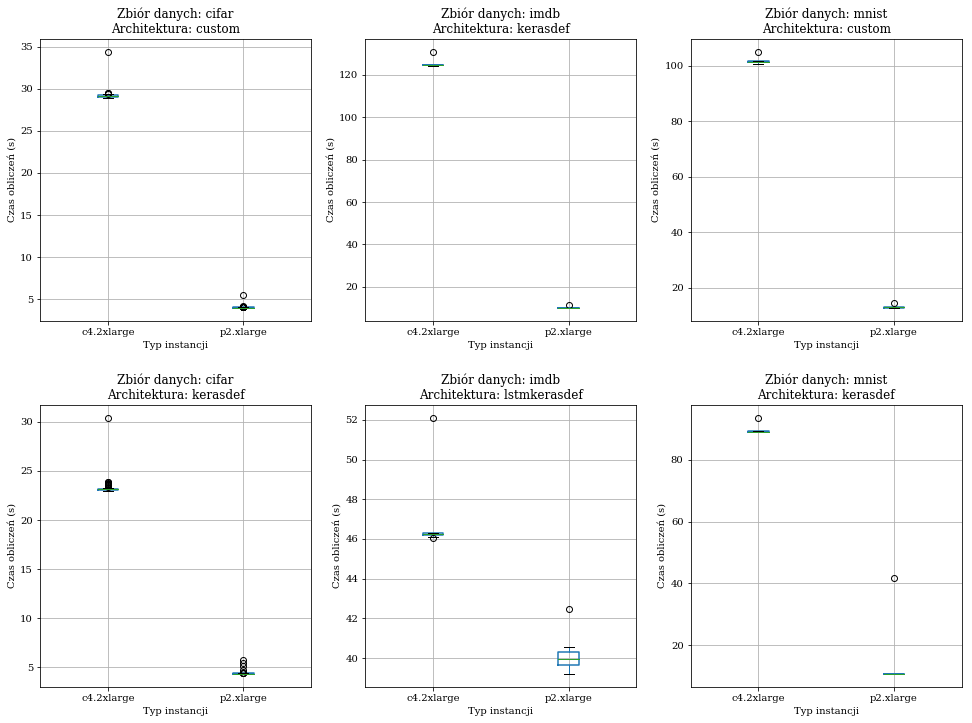

In [170]:
plt.show()